# Введение в обработку естественного языка (Natural Language Processing - NLP)

## Определение NLP

NLP - это область исследований, которая занимается взаимодействием между компьютерами и естественным человеческим языком. Основная цель NLP - научить компьютеры понимать, интерпретировать и генерировать текст на естественных языках.

## Зачем нужна NLP?

1. **Понимание текста:** NLP позволяет компьютерам анализировать и понимать смысл текста, распознавать ключевые слова и извлекать информацию.

2. **Машинный перевод:** NLP применяется для автоматического перевода текстов с одного языка на другой, облегчая коммуникацию между людьми, говорящими разными языками.

3. **Извлечение информации:** Алгоритмы NLP позволяют автоматически извлекать информацию из текстов, делая процесс анализа больших объемов данных более эффективным.

4. **Генерация текста:** NLP используется для создания программ, способных генерировать человекоподобный текст, что находит применение в создании контента, а также в чат-ботах.

5. **Распознавание речи:** Технологии NLP активно применяются в системах распознавания речи, что позволяет компьютерам трактовать и обрабатывать устную информацию.

## Ключевые задачи NLP

1. **Токенизация:** Разделение текста на отдельные слова или токены.

2. **Лемматизация:** Приведение слова к его базовой форме (лемме), например, привести "бегущий" к "бежать".

3. **Стемминг:** Усечение слова до его основы, не обязательно совпадающей с леммой.

4. **Парсинг:** Анализ синтаксиса предложений для понимания их структуры.

5. **Извлечение информации:** Выделение важных фактов из текста.

6. **Классификация текста:** Присвоение тексту категории или метки.

## Проблемы NLP

1. **Омонимия и полисемия:** Слова с несколькими значениями могут вызывать путаницу.

2. **Неоднозначность:** Понимание контекста и выявление правильного смысла фразы.

3. **Разнообразие языка:** Различия в диалектах, жаргоне, сленге.

4. **Сентимент-анализ:** Анализ тональности текста может быть сложным из-за многозначности выражений.

5. **Отсутствие контекста:** Понимание текста требует учета широкого контекста, а не только отдельных слов.

## Технологии NLP

1. **Модели глубокого обучения:** Использование нейронных сетей для обработки и понимания текста.

2. **Методы обучения с учителем и без учителя:** Использование различных подходов к обучению моделей.

3. **Векторные представления слов:** Представление слов в виде векторов для улучшения работы семантического анализа.

4. **Технологии обработки речи:** Применение алгоритмов для распознавания и анализа устной речи.

5. **Использование больших данных:** Обучение моделей на больших объемах текстовых данных для повышения точности и эффективности.

NLP продолжает активно развиваться, внедряя новые методы и технологии, чтобы делать компьютеры все более взаимодействующими с естественным языком, открывая новые возможности в области автоматизации и обработки информации.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('Datasets/US-Economic-News.csv', encoding='ISO-8859-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [3]:
data.shape

(8000, 15)

In [4]:
data["relevance"].value_counts()

relevance
no          6571
yes         1420
not sure       9
Name: count, dtype: int64

In [5]:
data = data[data.relevance != "not sure"]
data.shape

(7991, 15)

In [6]:
data["relevance"].value_counts() / data.shape[0]

relevance
no     0.8223
yes    0.1777
Name: count, dtype: float64

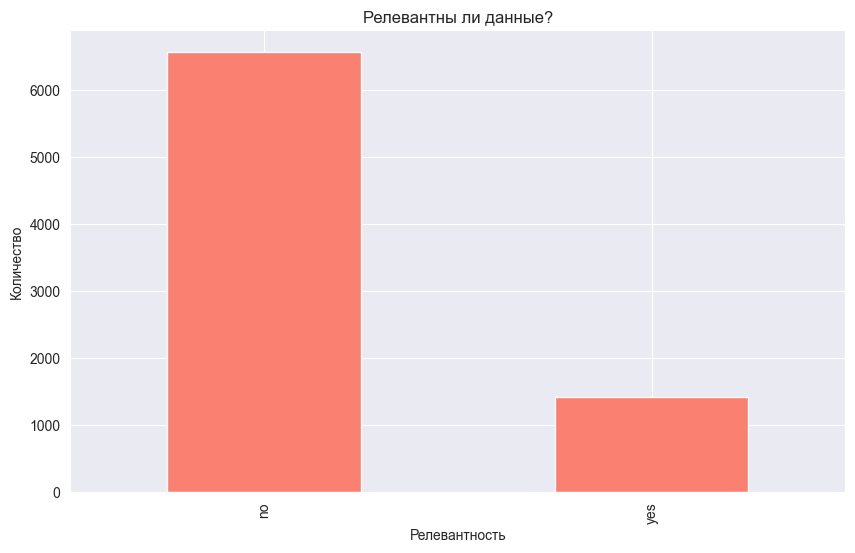

In [9]:
plt.figure(figsize=(10, 6))
data['relevance'].value_counts().plot(kind='bar', color='salmon')
plt.title("Релевантны ли данные?")
plt.xlabel("Релевантность")
plt.ylabel("Количество")
plt.show()

# Предобработка данных

In [10]:
data['relevance'] = data.relevance.map({'yes': 1, 'no': 0})  # релевантно - 1, не релевантно - 0

In [11]:
data = data[["text", "relevance"]]  # использование текстовых переменных ввода и вывода в качестве релевантных
data = data[:1000]
data.shape

(1000, 2)

In [12]:
data.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


In [13]:
data['text'][0]

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

# Очистка текста

### Удалим именованные объекты.
### Весь текст переведем в нижний регистр.
### Заменим "< /br >" на пробел.
### Заменим дефисы пробелами.
### Удалим символы пунктуации.
### Удалим стопслова.
### Применим лемматизацию.

In [15]:
import spacy
from stop_words import get_stop_words
import string

# Загрузка модели spaCy для обработки текста на английском языке
nlp = spacy.load('en_core_web_sm')
# Получение списка стоп-слов для английского языка
stopwords = get_stop_words('en')

def clean(doc):
    # Инициализация списка для хранения текста без именованных сущностей
    text_no_namedentities = []
    # Обработка текста с использованием spaCy
    document = nlp(doc)
    # Извлечение текста именованных сущностей
    ents = [e.text for e in document.ents]
    
    # Фильтрация текста, исключая именованные сущности
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    
    # Обновление переменной doc с текстом без именованных сущностей
    doc = " ".join(text_no_namedentities)
    # Приведение текста к нижнему регистру и удаление пробелов
    doc = doc.lower().strip()
    # Замена специальных токенов
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    # Удаление пунктуации и цифр
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Удаление стоп-слов
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # Лемматизация текста
    doc = " ".join([token.lemma_ for token in nlp(doc)])
    
    return doc

In [16]:
# Протестируем функцию на первой строке
cleaned_text = clean(data['text'][0])
print(cleaned_text)

new york yield certificate deposit offer major bank drop tenth percentage point late week reflect overall decline short term interest rate br small denomination consumer cd sell directly bank average yield six month deposit fall week end yesterday accord bank survey money market information service br three month consumer deposit average yield sink week accord bank survey new york pay less small denomination decline somewhat small five year consumer cd ease say br yield three month six month bill sell s auction plummet fifth percentage point previous week respectively


In [17]:
data['text'] = data['text'].apply(clean)
data.head()

,text,relevance
0,new york yield certificate deposit offer major...,1
1,wall street journal online br morning brief lo...,0
2,effort achieve banking reform negotiator admin...,0
3,statistic enormous cost employee drug abuse we...,0
4,new york indecision mark dollar s tone trader ...,1


# TF-IDF Векторизатор

## Что такое TF-IDF?

TF-IDF (Term Frequency-Inverse Document Frequency) - это метод векторизации текста, используемый для преобразования текстовых данных в числовой формат, позволяя алгоритмам машинного обучения работать с текстом.

### Как это работает?

1. **Term Frequency (TF):** Оценивает важность слова в пределах конкретного документа. Формула TF = (Количество раз, когда слово появляется в документе) / (Общее количество слов в документе).

2. **Inverse Document Frequency (IDF):** Оценивает важность слова в контексте всего корпуса документов. Формула IDF = log(Общее количество документов / (Количество документов, содержащих данное слово) + 1).

3. **TF-IDF:** Умножение значений TF и IDF для каждого слова. Высокий TF-IDF обозначает, что слово встречается часто в конкретном документе, но редко в остальных, что делает его важным для этого документа.

### Зачем нужна TF-IDF векторизация?

1. **Выделение важных слов:** TF-IDF выделяет ключевые слова, которые могут быть важными для понимания содержания документа.

2. **Уменьшение влияния часто встречающихся слов:** Стоп-слова (часто встречающиеся слова, такие как "и", "в", "не") могут иметь высокий TF, но низкий IDF, что уменьшает их влияние.

3. **Поиск похожих документов:** Документы с близкими векторами TF-IDF считаются похожими, что полезно для задач поиска и кластеризации.

## Сравнение с другими методами векторизации

1. **Bag of Words (BoW):** Простой метод, который учитывает только частоту слов в документе. Не учитывает важность слова в контексте всего корпуса, что делает его менее информативным.

2. **Word Embeddings (Word2Vec, GloVe):** Используют плотные векторы для слов, учитывают семантические отношения. Однако требуют больше данных и могут не справляться с редкими словами.

3. **Doc2Vec:** Расширение Word2Vec для работы с целыми документами. Может быть сложным в обучении и требовать больших объемов данных.

TF-IDF векторизация является хорошим компромиссом между простотой и информативностью, широко используется в задачах анализа текста и машинного обучения на основе текста.

In [18]:
docs = list(data['text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [19]:
X = docs
y = data['relevance']
print(X.shape, y.shape)

(1000, 9725) (1000,)


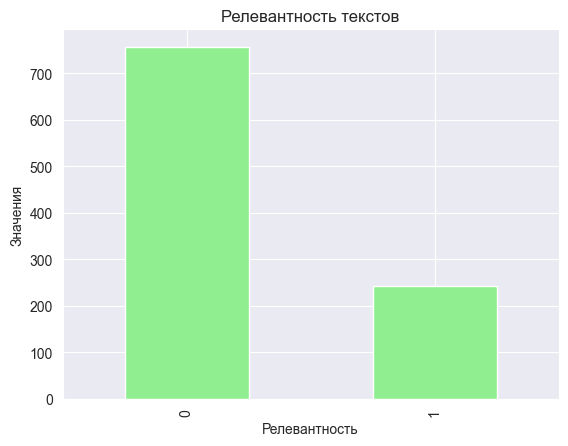

In [20]:
y.value_counts().plot(kind='bar', color="lightgreen")
plt.title("Релевантность текстов")
plt.xlabel("Релевантность")
plt.ylabel("Значения")
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 9725) (800,)
(200, 9725) (200,)


# Наивный Байесовский классификатор

In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [25]:
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 0.995
Точность на тестовом наборе: 0.755


In [26]:
report = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(report)

              precision    recall  f1-score   support

not relevant       0.77      0.97      0.86       151
    relevant       0.50      0.08      0.14        49

    accuracy                           0.76       200
   macro avg       0.63      0.53      0.50       200
weighted avg       0.70      0.76      0.68       200


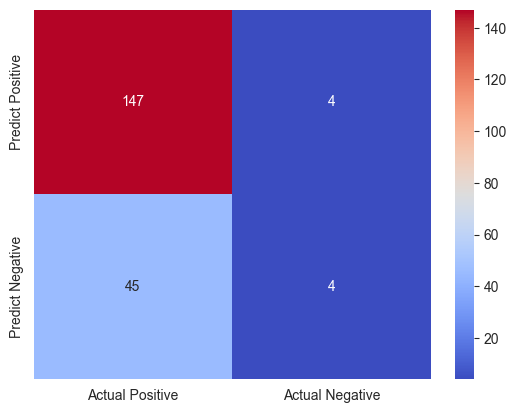

In [27]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

## Многочленный наивный Байесовский алгоритм

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

In [30]:
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 0.7575
Точность на тестовом наборе: 0.755


In [31]:
result = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(result)

              precision    recall  f1-score   support

not relevant       0.76      1.00      0.86       151
    relevant       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200


C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

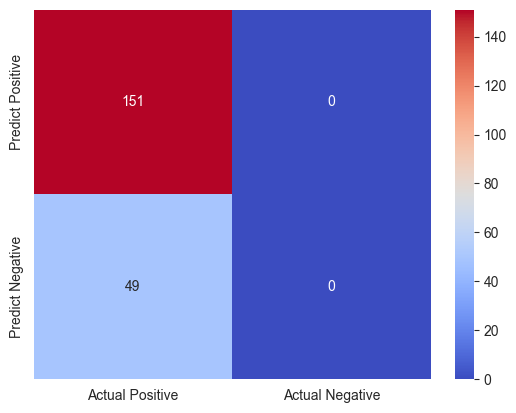

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

## Логистическая регрессия

In [33]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [35]:
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 0.815
Точность на тестовом наборе: 0.765


In [36]:
results = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(results)

              precision    recall  f1-score   support

not relevant       0.77      0.99      0.86       151
    relevant       0.67      0.08      0.15        49

    accuracy                           0.77       200
   macro avg       0.72      0.53      0.50       200
weighted avg       0.74      0.77      0.69       200


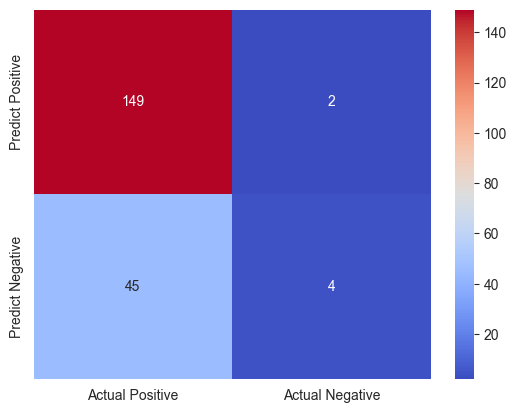

In [37]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

## Support Vector Machines

In [38]:
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)

C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [39]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [40]:
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 0.99625
Точность на тестовом наборе: 0.705


In [41]:
repo = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(repo)

              precision    recall  f1-score   support

not relevant       0.81      0.79      0.80       151
    relevant       0.40      0.43      0.42        49

    accuracy                           0.70       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.71      0.70      0.71       200


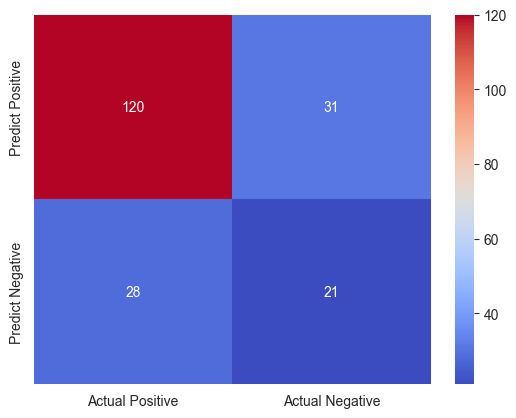

In [42]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

## Дерево решений

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 1.0
Точность на тестовом наборе: 0.725


In [46]:
repor = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(repor)

              precision    recall  f1-score   support

not relevant       0.80      0.84      0.82       151
    relevant       0.43      0.37      0.40        49

    accuracy                           0.72       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.71      0.72      0.72       200


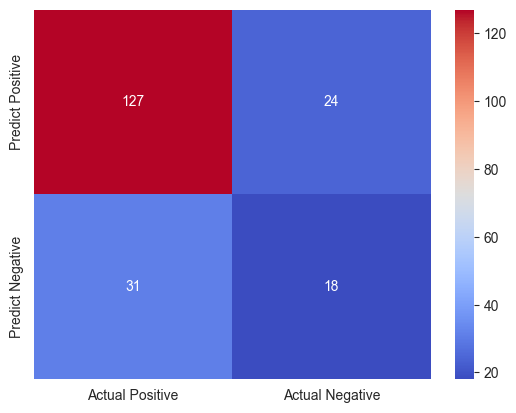

In [47]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

## Ансамбли

In [48]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
               ('Naive Bayes', gnb)
               ]

In [49]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('Naive Bayes', GaussianNB())])

In [50]:
y_pred_train = vc.predict(X_train)
y_pred_test = vc.predict(X_test)

In [51]:
print("Точность на треноровочном наборе:", accuracy_score(y_train, y_pred_train))
print("Точность на тестовом наборе:", accuracy_score(y_test, y_pred_test))

Точность на треноровочном наборе: 1.0
Точность на тестовом наборе: 0.755
